In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [644]:
no_inv = "data/data_100q.csv"
inv = "data/data_C_2.csv"

df_inv = pd.read_csv(inv)
df_no_inv = pd.read_csv(no_inv)

Text(0.5, 1.0, 'F & E')

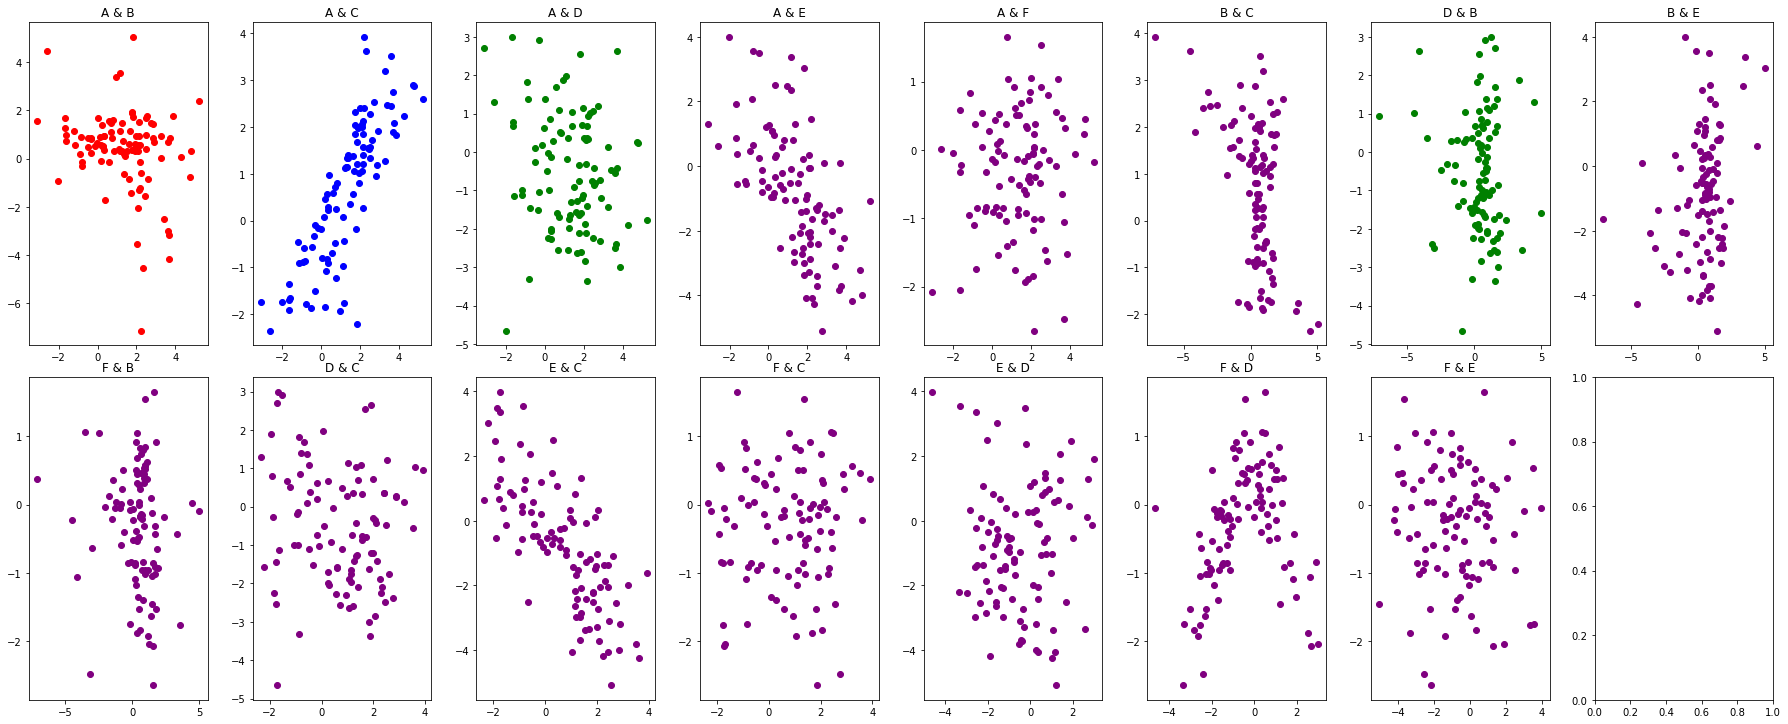

In [645]:
#define subplots
fig, ax = plt.subplots(2, 8, figsize=(25,10))
fig.tight_layout()

#create subplots
ax[0, 0].scatter(df_no_inv["A"], df_no_inv["B"], color='red')
ax[0, 0].set_title('A & B')
ax[0, 1].scatter(df_no_inv["A"], df_no_inv["C"], color='blue')
ax[0, 1].set_title('A & C')
ax[0, 2].scatter(df_no_inv["A"], df_no_inv["D"], color='green')
ax[0, 2].set_title('A & D')
ax[0, 3].scatter(df_no_inv["A"], df_no_inv["E"], color='purple')
ax[0, 3].set_title('A & E')
ax[0, 4].scatter(df_no_inv["A"], df_no_inv["F"], color='purple')
ax[0, 4].set_title('A & F')
ax[0, 5].scatter(df_no_inv["B"], df_no_inv["C"], color='purple')
ax[0, 5].set_title('B & C')
ax[0, 6].scatter(df_no_inv["B"], df_no_inv["D"], color='green')
ax[0, 6].set_title('D & B')
ax[0, 7].scatter(df_no_inv["B"], df_no_inv["E"], color='purple')
ax[0, 7].set_title('B & E')
ax[1, 0].scatter(df_no_inv["B"], df_no_inv["F"], color='purple')
ax[1, 0].set_title('F & B')
ax[1, 1].scatter(df_no_inv["C"], df_no_inv["D"], color='purple')
ax[1, 1].set_title('D & C')
ax[1, 2].scatter(df_no_inv["C"], df_no_inv["E"], color='purple')
ax[1, 2].set_title('E & C')
ax[1, 3].scatter(df_no_inv["C"], df_no_inv["F"], color='purple')
ax[1, 3].set_title('F & C')
ax[1, 4].scatter(df_no_inv["D"], df_no_inv["E"], color='purple')
ax[1, 4].set_title('E & D')
ax[1, 5].scatter(df_no_inv["D"], df_no_inv["F"], color='purple')
ax[1, 5].set_title('F & D')
ax[1, 6].scatter(df_no_inv["E"], df_no_inv["F"], color='purple')
ax[1, 6].set_title('F & E')


Variance

In [646]:
A_var = np.var(df_no_inv["A"])
B_var = np.var(df_no_inv["B"])
C_var = np.var(df_no_inv["C"])
D_var = np.var(df_no_inv["D"])
E_var = np.var(df_no_inv["E"])
F_var = np.var(df_no_inv["F"])

A2_var = np.var(df_inv["A"])
B2_var = np.var(df_inv["B"])
C2_var = np.var(df_inv["C"])
D2_var = np.var(df_inv["D"])
E2_var = np.var(df_inv["E"])
F2_var = np.var(df_inv["F"])

print(A_var, B_var, C_var, D_var, E_var, F_var)
print(A2_var, B2_var, C2_var, D2_var, E2_var, F2_var)

2.7023740490745762 2.7792320452097954 2.3042618507343433 2.3976861790835544 3.83171611599437 0.7763209804242929
0.7370622502698961 2.3684482087482013 0.0 2.0157395617573246 1.4763135333104769 0.7624887825094419


Mean

In [647]:
A_mean = np.mean(df_no_inv["A"])
B_mean = np.mean(df_no_inv["B"])
C_mean = np.mean(df_no_inv["C"])
D_mean = np.mean(df_no_inv["D"])
E_mean = np.mean(df_no_inv["E"])
F_mean = np.mean(df_no_inv["F"])

A2_mean = np.mean(df_inv["A"])
B2_mean = np.mean(df_inv["B"])
C2_mean = np.mean(df_inv["C"])
D2_mean = np.mean(df_inv["D"])
E2_mean = np.mean(df_inv["E"])
F2_mean = np.mean(df_inv["F"])



print(A2_mean, B2_mean, C2_mean, D2_mean, E2_mean, F2_mean)
print(A_mean,  B_mean, C_mean, D_mean, E_mean, F_mean)

2.4662890400900004 -0.11524047220999994 2.0 -0.85251786713 -2.0488630027699997 -0.18946973374000006
1.3103155175899999 0.37199802088999995 0.6739262588999999 -0.5243638886900002 -0.8032431023599994 -0.31361800262999995


In [648]:
array = np.array([[A2_mean, B2_mean, C2_mean, D2_mean, E2_mean, F2_mean], 
                  [A_mean, B_mean, C_mean, D_mean, E_mean, F_mean]])
  
# creating a list of index names
index_values = ['mean_after', 'mean_before']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D', 'E', 'F']

before_aftermean = pd.DataFrame(array, index_values, column_values)
before_aftermean

,A,B,C,D,E,F
mean_after,2.466289,-0.115240,2.000000,-0.852518,-2.048863,-0.189470
mean_before,1.310316,0.371998,0.673926,-0.524364,-0.803243,-0.313618


In [661]:
def meanCI(var, is_inv = False):
    if is_inv:
        data = df_inv[var]
    else: 
        data = df_no_inv[var]
    means_list = []
    for _ in range(10):
        subsamp = data.sample(20, replace=True)
        mean = np.mean(subsamp)
        means_list.append(mean)
        CIupper = np.mean(means_list) + 1.96 * ( np.std(means_list) /  np.sqrt(len(means_list))  )
        CIlower = np.mean(means_list) - 1.96 * ( np.std(means_list) /  np.sqrt(len(means_list))  )
    return (CIlower, np.mean(means_list) , CIupper)

def overlap(CI1, CI2):
    if CI1[0] > CI2[2] or CI2[0] > CI1[2]:
        return False
    else:
        return True
    
print(meanCI("F"), meanCI("F", is_inv=True))

lap = [overlap(meanCI("E"), meanCI("E", is_inv=True)) for _ in range(100)]

if lap.count(False) == 0:
    print("No overlap")
if lap.count(True) == 0:
    print("Full overlap")
else:
    print(lap.count(False) , lap.count(True))


(-0.4526963889010709, -0.29946006939, -0.14622374987892914) (-0.3369481108519208, -0.20401180695, -0.07107550304807925)
Full overlap


In [650]:
array = np.array([[A2_var, B2_var, C2_var, D2_var, E2_var, F2_var], 
                  [A_var, B_var, C_var, D_var, E_var, F_var]])
  
# creating a list of index names
index_values = ['var_after', 'var_before']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D', 'E', 'F']

before_aftervar = pd.DataFrame(array, index_values, column_values)
before_aftervar

,A,B,C,D,E,F
var_after,0.737062,2.368448,0.000000,2.015740,1.476314,0.762489
var_before,2.702374,2.779232,2.304262,2.397686,3.831716,0.776321


In [651]:
def percentage_diff(var1, var2):
    if var2 == 0:
        var2 = 1e-12
    return abs(((var2 - var1) / abs(var1)) * 100)

In [652]:
array = np.array([[percentage_diff(A_mean, A2_mean), percentage_diff(B_mean, B2_mean), percentage_diff(C_mean, C2_mean), percentage_diff(D_mean, D2_mean), percentage_diff(E_mean, E2_mean), percentage_diff(F_mean, F2_mean)],
                  [percentage_diff(A_var, A2_var), percentage_diff(B_var, B2_var), percentage_diff(C_var, C2_var), percentage_diff(D_var, D2_var), percentage_diff(E_var, E2_var), percentage_diff(F_var, F2_var)]])

# creating a list of index names
index_values = ['mean%', 'var%']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D', 'E', 'F']

tab1 = pd.DataFrame(array, index_values, column_values)
tab1

,A,B,C,D,E,F
mean%,88.221005,130.978786,196.768374,62.581346,155.073837,39.585823
var%,72.725380,14.780480,100.000000,15.929800,61.471218,1.781763


In [653]:
rs = np.random.RandomState(0)
corr = df_no_inv.corr()
corr.style.background_gradient(cmap='magma')

,Unnamed: 0,A,B,C,D,E,F
Unnamed: 0,1.000000,-0.045853,0.004059,-0.084139,0.006305,0.112513,0.020701
A,-0.045853,1.000000,-0.257273,0.815396,-0.182891,-0.610381,0.088674
B,0.004059,-0.257273,1.000000,-0.499804,-0.084053,0.271208,-0.113353
C,-0.084139,0.815396,-0.499804,1.000000,-0.144981,-0.745766,0.035064
D,0.006305,-0.182891,-0.084053,-0.144981,1.000000,-0.019757,0.221332
E,0.112513,-0.610381,0.271208,-0.745766,-0.019757,1.000000,-0.092508
F,0.020701,0.088674,-0.113353,0.035064,0.221332,-0.092508,1.000000


In [654]:
corr = df_inv.corr()
corr.style.background_gradient(cmap='magma')

/Users/kristofferkjaer/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/kristofferkjaer/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unnamed: 0,A,B,C,D,E,F
Unnamed: 0,1.000000,-0.011700,0.003118,nan,0.024058,0.034762,0.091227
A,-0.011700,1.000000,0.005735,nan,-0.050666,0.078829,0.000753
B,0.003118,0.005735,1.000000,nan,-0.240923,-0.119412,-0.338764
C,nan,nan,nan,nan,nan,nan,nan
D,0.024058,-0.050666,-0.240923,nan,1.000000,-0.273771,0.489896
E,0.034762,0.078829,-0.119412,nan,-0.273771,1.000000,-0.063248
F,0.091227,0.000753,-0.338764,nan,0.489896,-0.063248,1.000000


Correlation between x and y: -0.11


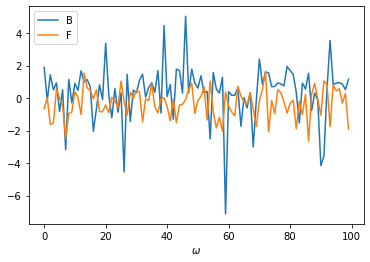

<Figure size 432x288 with 0 Axes>

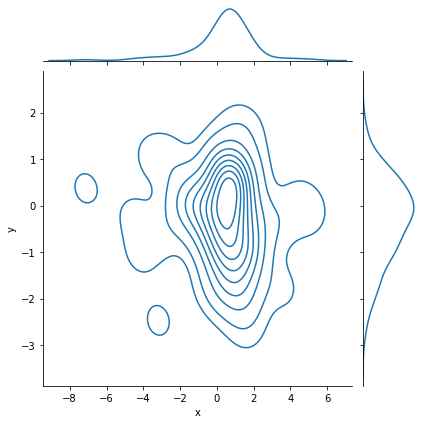

In [655]:
plt.figure();
plt.plot(df_no_inv["B"]);
plt.plot(df_no_inv["F"]);
plt.legend(('B','F'));
plt.xlabel(r'$\omega$');
print('Correlation between x and y: %.2f'%np.corrcoef(df_no_inv["B"],df_no_inv["F"])[0,1]);
plt.figure();
sns.jointplot(data={'x':df_no_inv["B"],'y':df_no_inv["F"]},x='x',y='y',kind='kde');

In [656]:
def MI(x,y,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    plt.suptitle('Mutual information: %f'%MI)
    return(MI)


0.8598408498462025

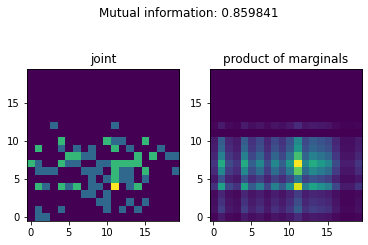

In [657]:
MI(df_no_inv["C"],df_no_inv["F"])